INTRODUCTION

This dataset contains **10,000 customer records** with details about demographics, account information, and financial status. Key features include **CreditScore**, **Geography**, **Age**, **Balance**, and **EstimatedSalary**. The target variable, **Exited**, indicates whether a customer has churned (1) or remained (0). This dataset is useful for predicting customer churn and understanding factors that influence customer retention.

IMPORT LABARIES AND LOAD DATASET 

In [1]:
#import libaries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
#import dataset
df=pd.read_csv(r'C:\Data Science\data_set\Customer Churn new.csv')
print(df)




      RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0           747    15787619      Hsieh          844    France    Male   18   
1          1620    15770309   McDonald          656    France    Male   18   
2          1679    15569178  Kharlamov          570    France  Female   18   
3          2022    15795519   Vasiliev          716   Germany  Female   18   
4          2137    15621893   Bellucci          727    France    Male   18   
...         ...         ...        ...          ...       ...     ...  ...   
9995       3532    15653251     Hickey          408    France  Female   84   
9996       3034    15578006        Yao          787    France  Female   85   
9997       2459    15813303    Rearick          513     Spain    Male   88   
9998       6444    15764927     Rogova          753    France    Male   92   
9999       6760    15660878      T'ien          705    France    Male   92   

      Tenure    Balance  EstimatedSalary  Exited  
0          2

DATA CLEANING 

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 859.5+ KB


In [3]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
EstimatedSalary    0
Exited             0
dtype: int64

In [4]:
df.duplicated().sum()

0

In [5]:
le=LabelEncoder()
df['Surname']=le.fit_transform(df['Surname'])
df['Geography']=le.fit_transform(df['Geography'])
df['Gender']=le.fit_transform(df['Gender'])

DATA VISUALIZATION BY FINDING CORRELATION BETWEEN THE DATAS

                 RowNumber  CustomerId   Surname  CreditScore  Geography  \
RowNumber         1.000000    0.004202  0.001682     0.005840  -0.010358   
CustomerId        0.004202    1.000000  0.005689     0.005308   0.006516   
Surname           0.001682    0.005689  1.000000     0.007489  -0.022878   
CreditScore       0.005840    0.005308  0.007489     1.000000   0.007888   
Geography        -0.010358    0.006516 -0.022878     0.007888   1.000000   
Gender            0.018196   -0.002641 -0.002049    -0.002857   0.004719   
Age               0.000783    0.009497  0.005550    -0.003965   0.022812   
Tenure           -0.006495   -0.014883 -0.017412     0.000842   0.003739   
Balance          -0.009067   -0.012419  0.002657     0.006268   0.069408   
EstimatedSalary  -0.005988    0.015271  0.011850    -0.001384  -0.001369   
Exited           -0.016571   -0.006248 -0.010822    -0.027094   0.035943   

                   Gender       Age    Tenure   Balance  EstimatedSalary  \
RowNumber  

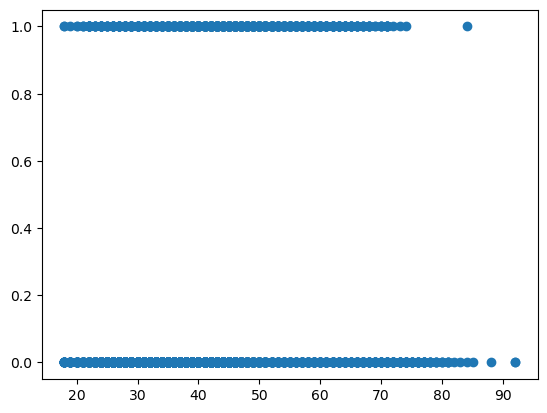

In [6]:

cor=df[['RowNumber','CustomerId',"Surname",'CreditScore','Geography','Gender','Age','Tenure',"Balance",'EstimatedSalary','Exited']].corr()
print(cor)
plt.scatter(df['Age'],df['Exited'])
plt.show()

EXTRACTING INDEPENDENT AND DEPENDENT 

In [7]:
x=df[['RowNumber','CustomerId',"Surname",'CreditScore','Geography','Gender','Age','Tenure',"Balance",'EstimatedSalary']].values
x=pd.DataFrame(x)
y=df['Exited'].values
y=pd.DataFrame(y)

SPLITING DATA INTO TRAIN AND TEST DATA

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=47)

FEATURE SCALING

In [9]:
st=StandardScaler()
x_train=st.fit_transform(x_train)
x_test=st.fit_transform(x_test)

MODEL BUILDING AND EVALUATE PREDICTIONS 

MODEL OF KNN

In [10]:
classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
classifier.fit(x_train,y_train)

KNeighborsClassifier()

In [11]:
y_predict=classifier.predict(x_test)
print(y_test)
print(y_predict)

      0
7432  0
5444  0
5448  1
8654  0
7543  1
...  ..
6746  0
2903  0
3893  0
7995  1
4070  0

[2000 rows x 1 columns]
[0 0 0 ... 0 1 0]


In [12]:
print("mse value of knn regression:",metrics.mean_squared_error(y_predict,y_test))
print("accuracy in knn regression:",metrics.accuracy_score(y_predict,y_test)*100)

mse value of knn regression: 0.2075
accuracy in knn regression: 79.25


MODEL OF LOGISTIC REGRESSION

In [13]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(multi_class='multinomial',random_state=80)
model.fit(x_train,y_train)

LogisticRegression(multi_class='multinomial', random_state=80)

In [14]:
y_predict=model.predict(x_test)
print(y_test)
print(y_predict)

      0
7432  0
5444  0
5448  1
8654  0
7543  1
...  ..
6746  0
2903  0
3893  0
7995  1
4070  0

[2000 rows x 1 columns]
[0 0 0 ... 0 0 0]


In [15]:
print("mse value of logistic regression:",metrics.mean_squared_error(y_predict,y_test))
print("accuracy in logistic regression:",metrics.accuracy_score(y_predict,y_test)*100)

mse value of logistic regression: 0.2195
accuracy in logistic regression: 78.05


MODEL OF SVM

In [16]:
from sklearn.svm import SVC
model1=SVC(kernel='linear',random_state=67)
model1.fit(x_train,y_train)

SVC(kernel='linear', random_state=67)

In [17]:
y_predict=model1.predict(x_test)
print(y_test)
print(y_predict)

      0
7432  0
5444  0
5448  1
8654  0
7543  1
...  ..
6746  0
2903  0
3893  0
7995  1
4070  0

[2000 rows x 1 columns]
[0 0 0 ... 0 0 0]


In [18]:
print("mse value of Svm regression:",metrics.mean_squared_error(y_predict,y_test))
print("accuracy in Svm regression:",metrics.accuracy_score(y_predict,y_test)*100)

mse value of Svm regression: 0.2095
accuracy in Svm regression: 79.05


MODEL OF RANDOM FOREST 

In [19]:
from sklearn.ensemble import RandomForestClassifier
model2=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=47)
model2.fit(x_train,y_train)


RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=47)

In [20]:
y_predict=model2.predict(x_test)
print(y_test)
print(y_predict)

      0
7432  0
5444  0
5448  1
8654  0
7543  1
...  ..
6746  0
2903  0
3893  0
7995  1
4070  0

[2000 rows x 1 columns]
[0 0 0 ... 0 1 0]


In [21]:
print("mse value of random forest:",metrics.mean_squared_error(y_predict,y_test))
print("accuracy in random forest:",metrics.accuracy_score(y_predict,y_test)*100)

mse value of random forest: 0.1955
accuracy in random forest: 80.45


MODEL OF DECISION TREE

In [22]:
from sklearn.tree import DecisionTreeClassifier
model3=DecisionTreeClassifier(criterion='entropy',random_state=80)
model3.fit(x_train,y_train)




DecisionTreeClassifier(criterion='entropy', random_state=80)

In [23]:
y_predict=model3.predict(x_test)
print(y_test)
print(y_predict)

      0
7432  0
5444  0
5448  1
8654  0
7543  1
...  ..
6746  0
2903  0
3893  0
7995  1
4070  0

[2000 rows x 1 columns]
[0 0 0 ... 0 0 0]


In [24]:
print("mse value of decision tree:",metrics.mean_squared_error(y_predict,y_test))
print("accuracy in decision tree:",metrics.accuracy_score(y_predict,y_test)*100)

mse value of decision tree: 0.273
accuracy in decision tree: 72.7


SUMMARY


This project aimed to prdedict target variable, Exited, indicates whether a customer has churned (1) or remained (0) by using the details..After processing we tested multiple models ,including Logistic regression ,Decision tree,Random forest,KNN,SVM,The Random forest model achieved the highest accuarcy of 80.45%,making it the best performing model. 